## CNN Exercises

This notebook contains an implementation of a custom-built CNN architecture as proposed by an assignment by the Foundations of Deep Learning class from MSc DSBA.

### Question 1 -  TRAIN ON CIFAR DATASET
In this exercise you are asked to train a Convolutional Neural Network (CNN) on the CIFAR10 dataset and visualize its feature maps.

2a) Download the CIFAR10 dataset using the already provided PyTorch dataloaders. 
*   Read and understand the following code
*   Feel free to add additional transformations for data augmentation

In [ ]:
## Download the CIFAR10 dataset using the PyTorch dataloaders
import torchvision
import torchvision.transforms as transforms
import torch

# *****START CODE 
## Data
##Here you are free to add further transform functions if you wish
BATCH_SIZE = 32
transform_train = transforms.Compose([
    transforms.ToTensor(),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
train_dataloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
val_dataloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False)
# *****END CODE

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


1b) Create your convolutional neural network.
*   Create your own CNN architecture, defining the modules that you want to include
*   Be sure you are using convolutional modules, activation functions as well as fully connected modules
*   Use different modules and hyperparameters to boost the performance of the network

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# We will base our CNN architecture following the guidelines of CS231n - https://cs231n.github.io/convolutional-networks/#overview
# INPUT -> [[CONV -> RELU]*N -> POOL?]*M -> [FC -> RELU]*K -> FC
# In short, we will stack Convolutions and Relu blocks followed by pooling at the hidden layers
# And at the end of the network, we will make use of fully connected layers before the final classification

# Thus, let's create the building blocks of our network
# We will add some depth to the general outlines by making our final architecture


# 
# *****START CODE
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        

        self.convolutional = nn.Sequential(
            nn.Conv2d(3,8,3,padding = 1),
            nn.ReLU(inplace = True),
            nn.MaxPool2d(2),

            nn.Conv2d(8,16,3),
            nn.ReLU(inplace = True),
            nn.Conv2d(16,64,3,padding = 1),
            nn.ReLU(inplace = True),
            nn.MaxPool2d(2),
            
            nn.Conv2d(64,64,3),
            nn.ReLU(inplace = True),
            nn.Conv2d(64,128,3,padding = 1),
            nn.ReLU(inplace = True),
            nn.MaxPool2d(2)
            
        )

        self.fc = nn.Sequential(
            nn.Linear(128*4 , 128*4 * 4),
            nn.ReLU(inplace = True),
            nn.Linear(128*4 * 4, 128*4 * 4),
            nn.ReLU(inplace = True),
            nn.Linear(128*4 * 4, 10)
        )
        
        
        
    def forward(self, x):
        x = self.convolutional(x)
        #print(x.size())
        v = x.view(x.shape[0], -1)
        x = self.fc(v)
        return x

# *****END CODE

cuda:0


1c) Create the training scheme
*    Call the model
*    Specify the training hyperparameters like type of optimizer and criterion
*    Specify number of epochs

In [ ]:
# *****START CODE
# Setting up the environment to cuda, if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = ConvNet().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss()
epochs = 30
# *****END CODE

#debug_dl = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

#img, lbl = next(iter(debug_dl))
#model(img.to(device))

#print(" ")


1d) Plot the train and validation loss curves for the entire training process
*   Validate the model after each epoch
*   Plot both training and validation loss curves
*   Write a small description discussing about the curves. What is the behaviour of the model?

In [ ]:
## Train the model and validate it after each epoch.
## Provide the train-val loss graph.

# *****START CODE
train_loss_epochs = []
val_loss_epochs = []

for epoch in range(1, epochs+1):
    running_loss = 0.0
    iters = 0

    # Training 
    for i, data in enumerate(train_dataloader, 0):
        
        # Turning on training mode for the network
        model.train()
        
        img_batch, lbl_batch = data

        optimizer.zero_grad()

        outputs = model(img_batch.to(device))
        loss = criterion(outputs, lbl_batch.to(device))
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        iters += 1

        if i+1 % 400 == 0:
          print(f"Epoch {epoch} - Train Loss at {i}: {running_loss / iters}")
          
    print(f"Training for epoch {epoch} finished with loss of: {running_loss / iters}")
    train_loss_epochs.append(running_loss/iters)
    running_loss = 0.0
    iters = 0
    # Validation 
    for i, data in enumerate(val_dataloader, 0):

        
        img_batch, lbl_batch = data

        optimizer.zero_grad()

        outputs = model(img_batch.to(device))
        loss = criterion(outputs, lbl_batch.to(device))

        # print statistics
        running_loss += loss.item()
        iters += 1

        #if i % 200 == 0:
        #  print(f"Epoch {epoch} - Validation Loss at {i}: {running_loss / iters}")

    print(f"Validation for epoch {epoch} finished with loss of: {running_loss / iters}")
    val_loss_epochs.append(running_loss/iters)
    
print('Finished Training')



# *****END CODE

Training for epoch 1 finished with loss of: 2.302735814358741
Validation for epoch 1 finished with loss of: 2.3022566024487774
Training for epoch 2 finished with loss of: 2.2993717172248043
Validation for epoch 2 finished with loss of: 2.2806220534510504
Training for epoch 3 finished with loss of: 2.080343486403931
Validation for epoch 3 finished with loss of: 1.9755571482661434
Training for epoch 4 finished with loss of: 1.8516787012951998
Validation for epoch 4 finished with loss of: 1.714551979360489
Training for epoch 5 finished with loss of: 1.622665250827621
Validation for epoch 5 finished with loss of: 1.5179676404014564
Training for epoch 6 finished with loss of: 1.469030132792504
Validation for epoch 6 finished with loss of: 1.4080630000026082
Training for epoch 7 finished with loss of: 1.349598337005364
Validation for epoch 7 finished with loss of: 1.4258552325038483
Training for epoch 8 finished with loss of: 1.247826931992175
Validation for epoch 8 finished with loss of: 1.

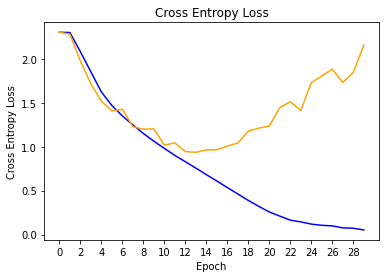

In [ ]:
import matplotlib.pyplot as plt

plt.title('Cross Entropy Loss')
plt.plot(train_loss_epochs, color='blue', label='train')
plt.plot(val_loss_epochs, color='orange', label='test')
plt.xlabel("Epoch")
plt.ylabel("Cross Entropy Loss")
plt.xticks(np.arange(0, epochs, 2))

plt.show()

**We can see clearly on the graph that there is an overfitting behavior in our model as the epochs increase. While as the model trains more, the model becomes continuously better on the training set while its performance gets progressively worse for the validation data.**

**This, of course, indicates that for this architecture we must consider either adding more overfitting-proof techiniques (such as dropout) or an early-stoppage at around the epoch. In order to not alter too much the architecture of the model for the following questions, we will simply apply a early-stoppage at around epoch 14, where the model presented the best results.**

In [ ]:
# Mouting to drive in order to save the best model
from google.colab import drive
drive = drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
model = ConvNet().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss()
epochs = 14


train_loss_epochs = []
val_loss_epochs = []

for epoch in range(1, epochs+1):
    running_loss = 0.0
    iters = 0

    # Training 
    for i, data in enumerate(train_dataloader, 0):
        
        # Turning on training mode for the network
        model.train()
        
        img_batch, lbl_batch = data

        optimizer.zero_grad()

        outputs = model(img_batch.to(device))
        loss = criterion(outputs, lbl_batch.to(device))
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        iters += 1

        if i+1 % 400 == 0:
          print(f"Epoch {epoch} - Train Loss at {i}: {running_loss / iters}")
          
    print(f"Training for epoch {epoch} finished with loss of: {running_loss / iters}")
    train_loss_epochs.append(running_loss/iters)
    running_loss = 0.0
    iters = 0
    # Validation 
    for i, data in enumerate(val_dataloader, 0):

        
        img_batch, lbl_batch = data

        optimizer.zero_grad()

        outputs = model(img_batch.to(device))
        loss = criterion(outputs, lbl_batch.to(device))

        # print statistics
        running_loss += loss.item()
        iters += 1

        #if i % 200 == 0:
        #  print(f"Epoch {epoch} - Validation Loss at {i}: {running_loss / iters}")

    print(f"Validation for epoch {epoch} finished with loss of: {running_loss / iters}")
    val_loss_epochs.append(running_loss/iters)
    
print("Finished Training")

torch.save(model.state_dict(), 'drive/My Drive/DSBA/FDL/model.pt')

Training for epoch 1 finished with loss of: 2.3027513213288837
Validation for epoch 1 finished with loss of: 2.302336950271655
Training for epoch 2 finished with loss of: 2.3012507178428
Validation for epoch 2 finished with loss of: 2.2960160380354324
Training for epoch 3 finished with loss of: 2.121318089527269
Validation for epoch 3 finished with loss of: 1.9481375925837996
Training for epoch 4 finished with loss of: 1.865681896893092
Validation for epoch 4 finished with loss of: 1.7440444074880581
Training for epoch 5 finished with loss of: 1.6508579275505861
Validation for epoch 5 finished with loss of: 1.60227938277272
Training for epoch 6 finished with loss of: 1.499932766875928
Validation for epoch 6 finished with loss of: 1.4803199528124387
Training for epoch 7 finished with loss of: 1.3825451412875152
Validation for epoch 7 finished with loss of: 1.4377683850523002
Training for epoch 8 finished with loss of: 1.2887216839207645
Validation for epoch 8 finished with loss of: 1.26

1e) Pick an intermediate layer from your convolutional neural network and visualize what patterns the network has learned
*   Complete the following code that visualizes the patterns of the network
*   Write a small description commenting on the visualized maps. What do you observe in the different visualizations of the feature maps?

Filter 0. Epoch 300. Loss = -145593.1094
Filter 1. Epoch 300. Loss = -328457.4062
Filter 2. Epoch 300. Loss = -160580.7656
Filter 3. Epoch 300. Loss = -292187.1875
Filter 4. Epoch 300. Loss = -27055.1602
Filter 5. Epoch 300. Loss = -104265.2578
Filter 6. Epoch 300. Loss = 0.0000
Filter 7. Epoch 300. Loss = -158617.6406
Filter 8. Epoch 300. Loss = -50091.4688
Filter 9. Epoch 300. Loss = -431831.5000
Filter 10. Epoch 300. Loss = -65098.2031
Filter 11. Epoch 300. Loss = -232972.9844
Filter 12. Epoch 300. Loss = -159708.8125
Filter 13. Epoch 300. Loss = -149874.6875
Filter 14. Epoch 300. Loss = -256401.9375
Filter 15. Epoch 300. Loss = -24809.4219


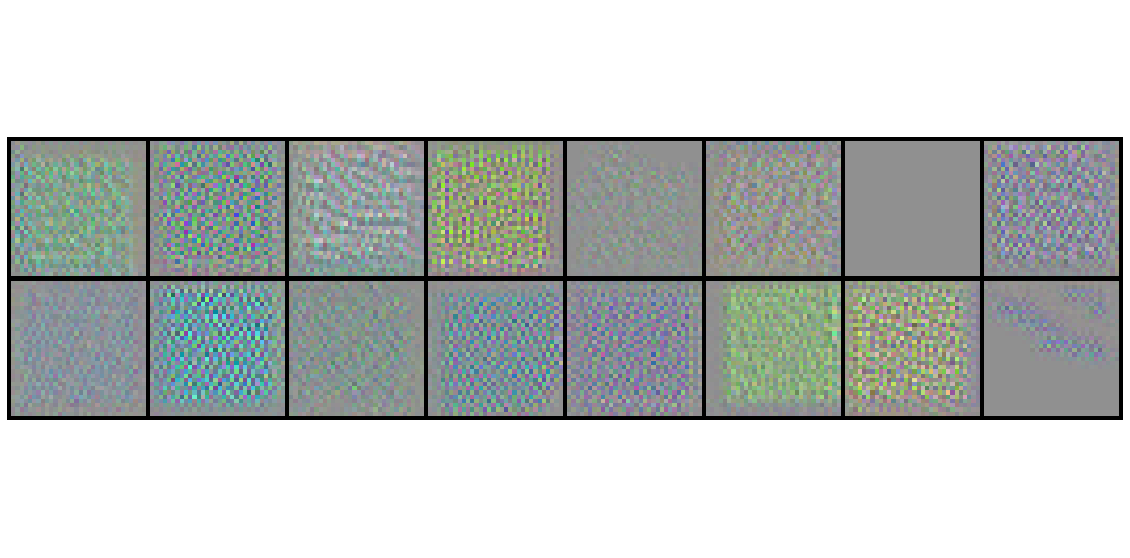

In [ ]:
import sys
from skimage import io
import torchvision.utils as vutils

##function for printing the loss during optimization
def write_flush(text, stream=sys.stdout):
    stream.write(text)
    stream.flush()
    return

## Number of feature maps in the intermediate layer that you have chosen. 
# *****START CODE
n_conv = 16  # e.g 64
# *****END CODE

## Size of visualised filter.
img_size = 32

##load your optimal model
# *****START CODE
model = ConvNet()
model.load_state_dict(torch.load('drive/My Drive/DSBA/FDL/model.pt')) 
# *****END CODE

## Create a submodel, until the intermediate layer of your choice.
## Hint: Use model.#name# to create the succession of layers, where #name#
## stands for the layer names that you defined in the initialization function 
## of your model.
# *****START CODE
submodel = nn.Sequential(
  nn.Conv2d(3,8,3,padding = 1),
  nn.ReLU(inplace = True),
  nn.MaxPool2d(2),

  nn.Conv2d(8,16,3),
  nn.ReLU(inplace = True)
            
)
# *****END CODE

## Put submodel in eval mode.
submodel.eval()

## Tensor to visualised filters. 
img_stack = torch.zeros((n_conv, 3, img_size, img_size))

## Number of epochs to run for every filter. 
# *****START CODE
n_epochs_per_filt = 300 #e.g 30
# *****END CODE

## Visualise every convolution. 
for c in range(n_conv):
    ## Initialise with random image. 
    img = torch.rand(1, 3, img_size, img_size).float()

    ## Turn on gradient calculation on the image
    # *****START CODE
    img.requires_grad_()
    # *****END CODE

    ## Define optimizer.
    # *****START CODE
    optimizer = torch.optim.SGD([img], lr=30)
    # *****END CODE
    
    for f in range(n_epochs_per_filt):
        optimizer.zero_grad()

        ## Feedforward propagation
        ## Hint: In order to find the loss, compupte the negative of the activation of the hidden layer. 
        ## The objective is to produce an input image which maximizes the activation 
        ## of neurons in a particular hidden layer. 
        # *****START CODE
        activation = submodel(img)
        loss = (-1 * activation[0][c]).sum()
        loss.backward()
        optimizer.step()

        if loss > -0.01:
          img = torch.rand(1, 3, img_size, img_size).float().requires_grad_()
          optimizer = torch.optim.SGD([img], lr=30)

        #loss = negative of the activation layer -> lower loss implies in a lot of activations!
        # *****END CODE
        write_flush('\rFilter %d. Epoch %d. Loss = %.4f'%(c, f+1, loss.item()))

    write_flush('\n')
    img_stack[c, :, :, :] = img[0].detach()

## Make grid out of visualized filters. 
##Here you may have to adjust the properties of vutils.make_grid, depending on your needs. 
##For example, you may need to change the number of rows.
G = vutils.make_grid(img_stack, nrow=8, normalize=True, padding=1).permute(1,2,0).numpy()
plt.figure(figsize=(20,10))
plt.imshow(G)
plt.axis('equal')
plt.axis('off')
plt.show()

**It seems that on this layer, the convolutions are focused on the color and the "texture" of the image. While the images are low-res and the chosen layer comes quite early in the network, we can already see the different noise patterns emerging as well as some details regarding the color choice and variety.** 

**Also notice that some images get stuck into a local minimum at the start and cannot get out. While a solution was implemented for most of these scenarios, promoting a new random initialization on the case of getting stuck, this unfortunately is not effective on every case. Regardless, the overall visualizations are obtained in this method for all filters and this can easily be adjusted for analysing a specific filter that might skip due to these bad initializations**

### Question 2 - Train on geometrical shapes

Function 'generate_a_triangle' produces images depicting random triangles along with the (x,y) coordinates of the vertices. Create a convolutional neural network that receives as input the triangle image and predicts the corresponding (x,y) coordinates of the triangle's vertices. 
*  Read and understand the following code

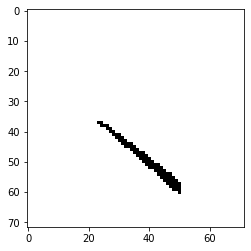

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_triangle():
    figsize = 1.0
    U = np.random.random(3)
    V = np.random.random(3)
    imdata = generate_a_drawing(figsize, U, V)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

[im, v] = generate_a_triangle()
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

def generate_dataset_regression(nb_samples):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 50 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle()
    X = X / 255
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300)
    return [X_test, Y_test]

2a) Use function 'generate_dataset_regression' to create the dataset. Split the dataset to training and validation parts.

In [ ]:
## We will abstract the 2a and 2b into a new custom Dataset from Pytorch
from  torch.utils.data import Dataset
##generate dataset
# *****START CODE
class TriangleDataset(Dataset):
  def __init__(self, n_samples=300, is_test=False):
      if not is_test:
        self.X, self.y = generate_dataset_regression(n_samples)
      else:
        self.X, self.y = generate_test_set_regression()
  def __len__(self):
      return len(self.X)
  def __getitem__(self, idx):
      return self.X[idx, :], self.y[idx, :]


# See 2b code section for these implementations
#train_dataset = torch.utils.data.DataLoader(TriangleDataset(600), batch_size=32, shuffle=True)
#val_dataset = torch.utils.data.DataLoader(TriangleDataset(200), batch_size=32, shuffle=True)
#test_dataset = torch.utils.data.DataLoader(TriangleDataset(is_test=True), batch_size=32, shuffle=True)

# *****END CODE

In [ ]:
##split the dataset to training and validation parts
import torch
# *****START CODE
BATCH_SIZE = 8

train_dataset = torch.utils.data.DataLoader(TriangleDataset(1000), batch_size=BATCH_SIZE, shuffle=True)
val_dataset = torch.utils.data.DataLoader(TriangleDataset(200), batch_size=BATCH_SIZE, shuffle=True)

# *****END CODE

Creating data:
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
Creating data:
0
50
100
150


2b) Use function 'generate_test_set' to create the testing dataset.

In [ ]:
##generate test dataset
# *****START CODE
test_dataset = torch.utils.data.DataLoader(TriangleDataset(is_test=True), batch_size=BATCH_SIZE, shuffle=True)
# *****END CODE

Creating data:
0
50
100
150
200
250


2c) Create your convolutional neural network.
* Similarly to the previous exercise construct your network and choose your modules
* Optimize the architecture to perform well on predicting the different coordinates

In [ ]:
# We will use a similar architecture than our previous example, except for 

import torch
import torch.nn as nn
import torch.nn.functional as F

# *****START CODE
class ConvNetR(nn.Module):
    def __init__(self):
        super(ConvNetR, self).__init__()

        self.convolutional = nn.Sequential(
            nn.Conv2d(1,4,3,padding = 1),
            nn.ReLU(inplace = True),
            nn.Conv2d(4,8,3,padding = 1),
            nn.ReLU(inplace = True),
            nn.MaxPool2d(2),

            nn.Conv2d(8,8,3),
            nn.ReLU(inplace = True),
            nn.Conv2d(8,8,3,padding = 1),
            nn.ReLU(inplace = True),
            nn.MaxPool2d(2),

            nn.Conv2d(8,8,3),
            nn.ReLU(inplace = True),
            nn.Conv2d(8,16,3,padding = 1),
            nn.ReLU(inplace = True),
            nn.MaxPool2d(2),
            
            nn.Conv2d(16,16,3),
            nn.ReLU(inplace = True),
            nn.Conv2d(16,32,3,padding = 1),
            nn.ReLU(inplace = True),
            nn.MaxPool2d(2)
            
        )

        self.fc = nn.Sequential(
            nn.Linear(128 , 128 * 4),
            nn.ReLU(inplace = True),
            nn.Linear(128* 4, 128* 4),
            nn.ReLU(inplace = True),
            nn.Linear(128 * 4, 6)
        )


    def forward(self, x):
        v = x.view(-1, 1, 72, 72)
        x = self.convolutional(v)
        #print(x.size())
        v = x.view(x.shape[0], -1)
        x = self.fc(v)
        return x

# *****END CODE

2d) Define model, optimizer, criterion and number of epochs.

In [ ]:
# *****START CODE
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = ConvNetR().to(device)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.MSELoss()
epochs = 30
# *****END CODE

2e) What criterion did you choose and why?
* Write a small description for the loss function that you want to use for this specific problem.
* What was your intuition for using this loss?

**The MSE Loss function is a function that captures the sum of the squared distances between the estimated points and the actual points. Therefore, the closer the distance between the estimation and the ground truth, the lower the loss**

**The choice for the MSE loss function is based on the fact that not only it captures distance (L2 distance), thus prioritizing closer estimations, but also because it is grounded on the concepts of geometric distance (as in, points in a plane). This provides a rather direct duality between the our learning target (the points of the triangle) and the loss function.** 

2f) Train your model and validate it at the end of each epoch.
* Similarly to the previous question train and validate your network for each epoch
* Write a small description on how you decide which is the optimal epoch
* Use this epoch and evaluate your model on the test set
* Visualise some predictions using the function 'visualize_prediction'
* What do you observe?

In [ ]:
# *****START CODE
train_loss_epochs = []
val_loss_epochs = []

for epoch in range(1, epochs+1):
    running_loss = 0.0
    iters = 0

    # Training 
    model.train()
    for i, data in enumerate(train_dataset, 0):
        
        # Turning on training mode for the network
        img_batch, lbl_batch = data[0].type(torch.cuda.FloatTensor), data[1].type(torch.cuda.FloatTensor)

        
        optimizer.zero_grad()
        outputs = model(img_batch)
        loss = criterion(outputs, lbl_batch)

        
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += float(loss.detach().item())
        iters += 1

        if i+1 % 400 == 0:
          print(f"Epoch {epoch} - Train Loss at {i}: {running_loss / iters}")
          
    print(f"Training for epoch {epoch} finished with average MSE loss of: {running_loss / iters}")
    train_loss_epochs.append(running_loss/iters)


    running_loss = 0.0
    iters = 0
    # Validation 
    model.eval()
    for i, data in enumerate(val_dataset, 0):


        img_batch, lbl_batch = data[0].type(torch.cuda.FloatTensor), data[1].type(torch.cuda.FloatTensor)

        optimizer.zero_grad()

        outputs = model(img_batch.to(device))
        loss = criterion(outputs, lbl_batch.to(device))

        # print statistics
        running_loss += float(loss.detach().item())
        iters += 1

        #if i % 200 == 0:
        #  print(f"Epoch {epoch} - Validation Loss at {i}: {running_loss / iters}")

    print(f"Validation for epoch {epoch} finished with average MSE loss of: {running_loss / iters}")
    val_loss_epochs.append(running_loss/iters)
    
print('Finished Training')


# *****END CODE

Training for epoch 1 finished with average MSE loss of: 0.1686137003302574
Validation for epoch 1 finished with average MSE loss of: 0.09151278838515281
Training for epoch 2 finished with average MSE loss of: 0.08600283125042915
Validation for epoch 2 finished with average MSE loss of: 0.08467488765716552
Training for epoch 3 finished with average MSE loss of: 0.08427719059586525
Validation for epoch 3 finished with average MSE loss of: 0.08484845459461213
Training for epoch 4 finished with average MSE loss of: 0.08429683429002761
Validation for epoch 4 finished with average MSE loss of: 0.08476885125041007
Training for epoch 5 finished with average MSE loss of: 0.08428481140732766
Validation for epoch 5 finished with average MSE loss of: 0.08489216417074204
Training for epoch 6 finished with average MSE loss of: 0.08433012345433236
Validation for epoch 6 finished with average MSE loss of: 0.08481399327516556
Training for epoch 7 finished with average MSE loss of: 0.08430869191884995
V

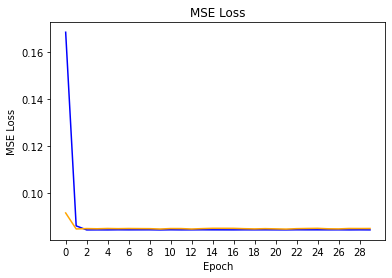

In [ ]:

plt.title('MSE Loss')
plt.plot(train_loss_epochs, color='blue', label='train')
plt.plot(val_loss_epochs, color='orange', label='test')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.xticks(np.arange(0, epochs, 2))

plt.show()

**Differently from the first exercise, we don't see the presence of overfitting on this problem. However, we see that there is pretty much no learning after around epoch 4, as the model has already found a local minima. Therefore, we can use it as basis for our final model to be runned on test.**

In [ ]:
def weight_reset(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        m.reset_parameters()

model.apply(weight_reset)

ConvNetR(
  (convolutional): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
    (16): ReLU(inplace=True)
    (17): Conv2d(16, 32, kernel_size=(

In [ ]:
# Training until the designed epoch
epochs = 4
for epoch in range(1, epochs+1):
    running_loss = 0.0
    iters = 0
    # Training
    
    model.train() 
    for i, data in enumerate(train_dataset, 0):
        
        # Turning on training mode for the network
        
        img_batch, lbl_batch = data

        optimizer.zero_grad()
        outputs = model(img_batch.to(device, dtype=torch.float))
        loss = criterion(outputs, lbl_batch.to(device, dtype=torch.float))
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += float(loss.detach().item())
        iters += 1

    print(f"Training for epoch {epoch} finished with average MSE loss of: {running_loss / iters}")


Training for epoch 1 finished with average MSE loss of: 0.16359819316864013
Training for epoch 2 finished with average MSE loss of: 0.08542205929756165
Training for epoch 3 finished with average MSE loss of: 0.08432874131202697
Training for epoch 4 finished with average MSE loss of: 0.08430779588222503


In [ ]:
# Running on test

running_loss = 0.0
iters = 0
# Training

model.eval() 
for i, data in enumerate(test_dataset, 0):
    
    # Turning on training mode for the network
    
    img_batch, lbl_batch = data

    outputs = model(img_batch.to(device, dtype=torch.float))
    loss = criterion(outputs, lbl_batch.to(device, dtype=torch.float))

    # print statistics
    running_loss += float(loss.detach().item())
    iters += 1

print(f"Test finished with average MSE loss of: {running_loss / iters}")

Test finished with average MSE loss of: 0.08630630756287198


**It seems the model is rather stable at a local minima of 0.86. However, it seems a rather high value for the final result. We can inspect that value to see if it is really guessing correctly the edges**

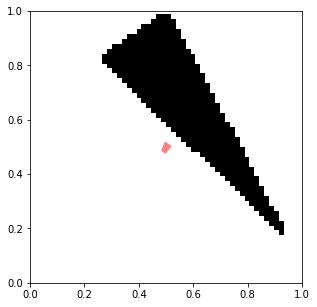

In [ ]:
batch, _ = next(iter(test_dataset))
image = batch[0, :]
outputs = model(image.to(device, dtype=torch.float))

image = image.cpu()
outputs = outputs.detach().cpu()

visualize_prediction(image, outputs)

**It seems that the network is prioritizing the non-commital approach of choosing only the middle points. That gives it reliable saddle points in the center, however it learns nothing! Thus, we need to consider different approaches in how can we change the problem definition so that the model actually attempts to find the edges and does not get stuck into these minima.**

**One such way is by changing the optimizer function**

In [ ]:

def weight_reset(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        m.reset_parameters()

model.apply(weight_reset)

model = ConvNetR().to(device)

optimizer = torch.optim.AdamW(model.parameters())
criterion = nn.MSELoss()

In [ ]:
# *****START CODE
epochs = 30

for epoch in range(1, epochs+1):
    running_loss = 0.0
    iters = 0
    # Training
    
    model.train() 
    for i, data in enumerate(train_dataset, 0):
        
        # Turning on training mode for the network
        
        img_batch, lbl_batch = data
        optimizer.zero_grad()
        outputs = model(img_batch.to(device, dtype=torch.float))
        loss = criterion(outputs, lbl_batch.to(device, dtype=torch.float))
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += float(loss.detach().item())
        iters += 1


    print(f"Training for epoch {epoch} finished with average MSE loss of: {running_loss / iters}")


# *****END CODE

Training for epoch 1 finished with average MSE loss of: 0.09656123104691505
Training for epoch 2 finished with average MSE loss of: 0.07909924125671387
Training for epoch 3 finished with average MSE loss of: 0.06224401563405991
Training for epoch 4 finished with average MSE loss of: 0.06053092619776726
Training for epoch 5 finished with average MSE loss of: 0.059558527797460556
Training for epoch 6 finished with average MSE loss of: 0.05945772288739681
Training for epoch 7 finished with average MSE loss of: 0.058989200383424756
Training for epoch 8 finished with average MSE loss of: 0.05922952350974083
Training for epoch 9 finished with average MSE loss of: 0.05873315984010696
Training for epoch 10 finished with average MSE loss of: 0.05884484824538231
Training for epoch 11 finished with average MSE loss of: 0.058164136797189715
Training for epoch 12 finished with average MSE loss of: 0.05855498057603836
Training for epoch 13 finished with average MSE loss of: 0.05855620139837265
Train

tensor([0.6111, 0.0635, 0.1166, 0.4757, 0.2246, 0.5019], dtype=torch.float64)
tensor([[0.2762, 0.3310, 0.3416, 0.3291, 0.3507, 0.3683]], device='cuda:0',
       grad_fn=<AddmmBackward>)


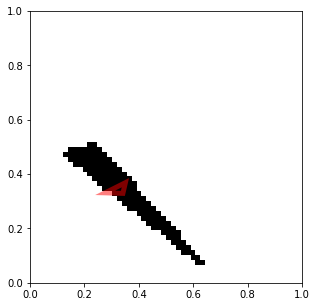

In [ ]:
batch, result = next(iter(test_dataset))
image = batch[0, :]
outputs = model(image.to(device, dtype=torch.float))
print(result[0, :])
print(outputs)
image = image.cpu()
outputs = outputs.detach().cpu()

visualize_prediction(image, outputs)

2g) Think and implement a preprocessing step that can boost the accuracy of your network

**One issue with the current implementation of the triangle is that the vertices are not defined in a specific order. Therefore, for a given triangle, the vertices can be arranged into 3! different ways (1,2,3), (2,1,3) etc.**

**This, of course, heavily compromises the capacity of the network in learning the desired behavior (that is, learning where the vertices are). Even if it guesses correctly the vertices locations, it is not always able to guess the random order in which they were allocated, resulting in high losses.**

**This essentially meant that a perfect network under that mapping had a 1/6th of chance to get the right result, which hampers the learning capacity of the network.**

**As previously discussed, this is a problem filled with local minima and saddle-points, so the generation of a order for the points is no silver bullet. However, it is a right step towards being able to train a model that works for solving the problem.**

**While it is very likely for other preproecssing optimizations to improve even further the results (for example, preprocessing on a image processing library to extract the color boundary, reorganizing the tensor in order to better describe the 3 R2 points etc.), we will stick with only the aforementioned solution in order to provide a proof of concept for the continous improvement after this adjustement over thousands of samples.**

In [ ]:
def order_by_closest_to_origin(vertices):
  result = []
  for a in vertices:
    dist = torch.Tensor([a[i] + a[i+1] for i in range(0, 6, 2)])
    values, indices = dist.sort()
    vertices = []
    for i in range(3):
      loc = np.where(indices==i)
      vertices.append(a[loc[0][0]*2])
      vertices.append(a[loc[0][0]*2 + 1])
    vertices = torch.Tensor(vertices) 
    result.append(vertices)
  result = torch.stack(result)
  return result

print(order_by_closest_to_origin(result))

tensor([[0.6634, 0.5227, 0.5357, 0.2038, 0.8064, 0.3172],
        [0.0724, 0.1062, 0.0434, 0.8406, 0.5109, 0.9914],
        [0.6465, 0.6696, 0.2295, 0.3812, 0.8938, 0.1198],
        [0.9612, 0.9498, 0.0348, 0.5799, 0.1564, 0.8189],
        [0.8695, 0.5727, 0.0030, 0.8292, 0.3368, 0.7153],
        [0.0580, 0.4606, 0.6191, 0.8352, 0.9191, 0.8629],
        [0.3657, 0.6050, 0.9757, 0.9908, 0.1338, 0.2080],
        [0.3125, 0.2762, 0.6283, 0.2652, 0.7875, 0.8817]])


In [ ]:

def weight_reset(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        m.reset_parameters()

model.apply(weight_reset)

model = ConvNetR().to(device)

optimizer = torch.optim.Adamax(model.parameters())
criterion = nn.MSELoss()

In [ ]:
# *****START CODE
epochs = 300

for epoch in range(1, epochs+1):
    running_loss = 0.0
    iters = 0
    # Training
    
    model.train() 
    for i, data in enumerate(train_dataset, 0):
        
        # Turning on training mode for the network
        
        img_batch, lbl_batch = data

        reordered_lbl = order_by_closest_to_origin(lbl_batch)
        optimizer.zero_grad()
        outputs = model(img_batch.to(device, dtype=torch.float))

        loss = criterion(outputs, reordered_lbl.to(device, dtype=torch.float))
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += float(loss.detach().item())
        iters += 1


    print(f"Training for epoch {epoch} finished with average MSE loss of: {running_loss / iters}")


    model.eval()
    for i, data in enumerate(val_dataset, 0):


        
        img_batch, lbl_batch = data

        reordered_lbl = order_by_closest_to_origin(lbl_batch)
        outputs = model(img_batch.to(device, dtype=torch.float))

        loss = criterion(outputs, reordered_lbl.to(device, dtype=torch.float))
        # print statistics
        running_loss += float(loss.detach().item())
        iters += 1

        #if i % 200 == 0:
        #  print(f"Epoch {epoch} - Validation Loss at {i}: {running_loss / iters}")

    print(f"Validation for epoch {epoch} finished with average MSE loss of: {running_loss / iters}")
# *****END CODE

Training for epoch 1 finished with average MSE loss of: 0.08065930879116058
Validation for epoch 1 finished with average MSE loss of: 0.08055479745070139
Training for epoch 2 finished with average MSE loss of: 0.08107382860779762
Validation for epoch 2 finished with average MSE loss of: 0.08036421870191891
Training for epoch 3 finished with average MSE loss of: 0.0807390975356102
Validation for epoch 3 finished with average MSE loss of: 0.08022683744629223
Training for epoch 4 finished with average MSE loss of: 0.07796772119402885
Validation for epoch 4 finished with average MSE loss of: 0.07565075486898422
Training for epoch 5 finished with average MSE loss of: 0.06020528581738472
Validation for epoch 5 finished with average MSE loss of: 0.059102774485945704
Training for epoch 6 finished with average MSE loss of: 0.0555818485468626
Validation for epoch 6 finished with average MSE loss of: 0.05424140171458324
Training for epoch 7 finished with average MSE loss of: 0.053734439820051196


KeyboardInterrupt: ignored

**Early stop due to overfit**

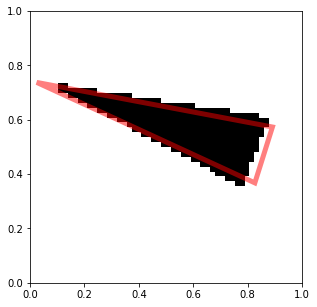

In [ ]:
batch, result = next(iter(test_dataset))
image = batch[0, :]
outputs = model(image.to(device, dtype=torch.float))

image = image.cpu()
outputs = outputs.detach().cpu()

visualize_prediction(image, outputs)